In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-train/titanic_train.csv


# Objective: modeling is a classification problem and evaluating it

In this project, we're going to model a binary problem with machine learning algorithms and evaluate each algorithm to determine the best of them.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

Our data titanic_train.csv is from Kegel
Data loading, **EDA** and **data cleaning** are done on it.

In [49]:
data = pd.read_csv('/kaggle/input/titanic-train/titanic_train.csv',sep=",")

# EDA

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Live or Dead by categorisation')

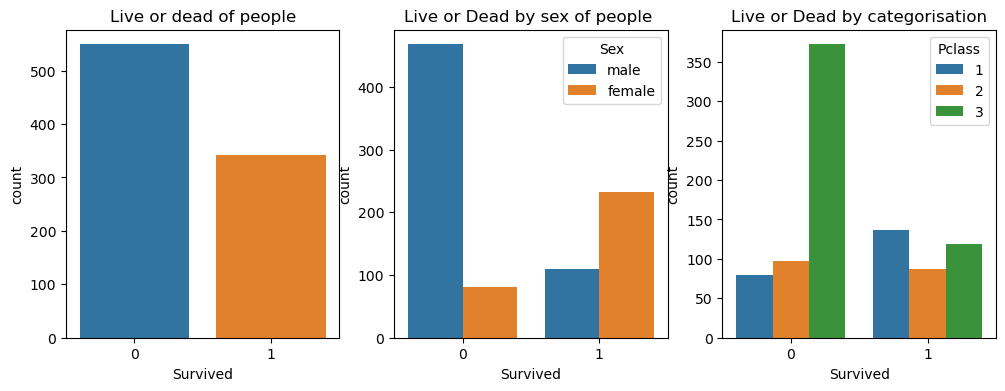

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)  
sns.countplot(data=data , x='Survived')
plt.title('Live or dead of people')

plt.subplot(1, 3, 2)  
sns.countplot(data=data ,hue='Sex', x='Survived')
plt.title('Live or Dead by sex of people ')

plt.subplot(1, 3, 3)  
sns.countplot(data=data ,hue='Pclass', x='Survived')
plt.title('Live or Dead by categorisation')

# Data cleaning

In [53]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Average for  attribute age**

In [54]:
print(data[data['Pclass']==1]['Age'].mean())
print(data[data['Pclass']==2]['Age'].mean())
print(data[data['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [55]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1 : return 38
        elif pclass == 2 : return 29
        else: return 25
    else:
        return age

data['Age']= data[['Age','Pclass']].apply(input_age , axis=1)

**MOD,Delete for attribute embarked , cabin**

In [56]:
data.drop('Cabin',axis=1,inplace=True)
max_embarked = data['Embarked'].value_counts().idxmax()
data['Embarked'].replace(np.nan,max_embarked,inplace=True)

# Prepressing Data

The characteristics that affect the goal variable "Survived" include: "Pclass","Sex","Age","Embarked","Fare"

In [60]:
columns_to_drop = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"]
data.drop(columns_to_drop, axis=1, inplace=True)

Converting categorical to numerical  properties using **Dummy variable**

In [61]:
embarked_dummies = pd.get_dummies(data['Embarked'], drop_first=False, prefix='Embarked')
sex_dummies = pd.get_dummies(data['Sex'], drop_first=True, prefix='Sex')
pclass_dummies = pd.get_dummies(data['Pclass'], drop_first=False, prefix='Pclass')

data = pd.concat([data, embarked_dummies, sex_dummies, pclass_dummies], axis=1)

data.drop(['Embarked', 'Sex', 'Pclass'], axis=1, inplace=True)


# Logistic Regression , Support Vector Machine ,Naive Bayes
Creating the right model of machine learning for these types of problems

1. Split data into training and testing data
2. Creating a model and train it
3. Model evaluation

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report

In [69]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.3)

# **Logistic Regression model**

In [74]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
predictions_logmodel = logmodel.predict(X_test)

In [99]:
print(confusion_matrix(y_test,predictions_logmodel))

[[147  33]
 [ 24  64]]


In [87]:
print(classification_report(y_test,predictions_logmodel))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       180
           1       0.66      0.73      0.69        88

    accuracy                           0.79       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.79      0.79      0.79       268



# **Support Vector Machin(SVM) model**

In [93]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [89]:
predictions_svm_model = svm_model.predict(X_test)

In [100]:
print(confusion_matrix(y_test,predictions_svm_model))

[[160  20]
 [ 64  24]]


In [91]:
print(classification_report(y_test,predictions_svm_model))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       180
           1       0.55      0.27      0.36        88

    accuracy                           0.69       268
   macro avg       0.63      0.58      0.58       268
weighted avg       0.66      0.69      0.65       268



# **Naive Bayes model**

In [94]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [95]:
predictions_naive_bayes_model = naive_bayes_model.predict(X_test)

In [101]:
print(confusion_matrix(y_test,predictions_naive_bayes_model))

[[135  45]
 [ 27  61]]


In [97]:
print(classification_report(y_test,predictions_naive_bayes_model))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       180
           1       0.58      0.69      0.63        88

    accuracy                           0.73       268
   macro avg       0.70      0.72      0.71       268
weighted avg       0.75      0.73      0.74       268



Now we have 3 evaluations of 3 different models for binary categorical problems, which we choose the best model according to the evaluation values.

The regression logistics model was the best among these 3 models

**Good luck**